# Pricipal Component Analysis (PCA) concept

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [69]:
df = pd.read_csv('./data_pd/pca_student_test_scores.csv')
df.head()

,studentID,spelling,vocabulary,multiplication,geometry
0,1,1.8,2.1,5.4,5.6
1,2,2.9,3.1,6.6,5.7
2,3,4.6,5.7,2.8,1.6
3,4,8.0,7.1,3.5,3.4
4,5,8.1,8.0,1.3,2.2


In [3]:
df.columns

Index(['studentID', 'spelling', 'vocabulary', 'multiplication', 'geometry'], dtype='object')

In [4]:
columns = ['spelling', 'vocabulary', 'multiplication', 'geometry']

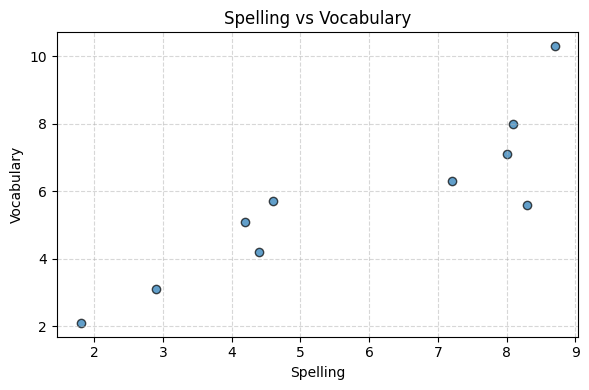

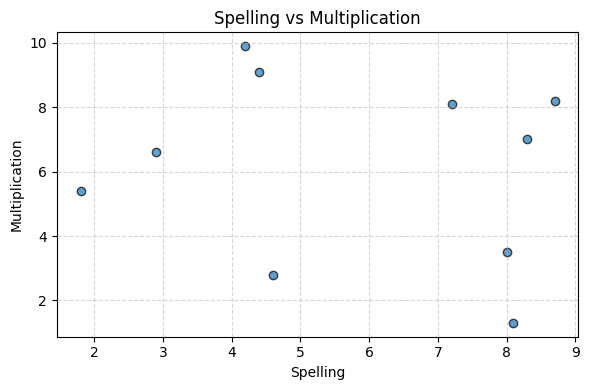

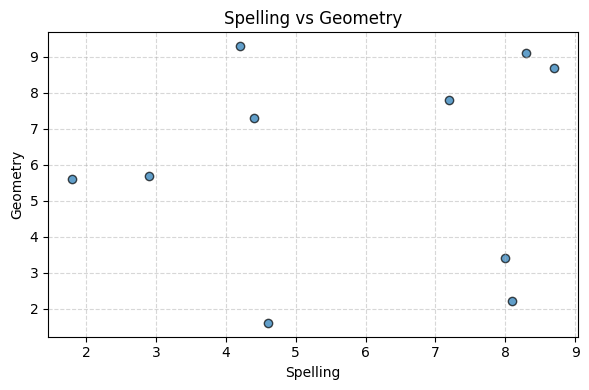

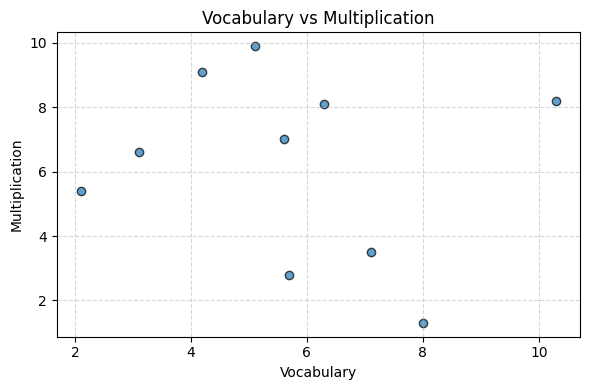

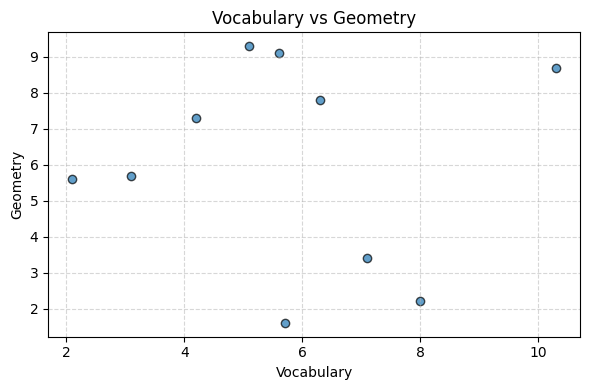

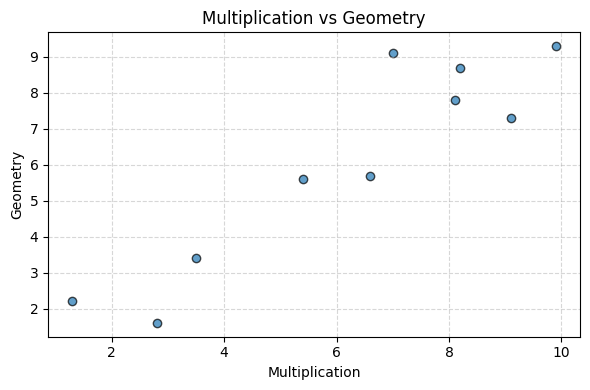

In [5]:
# Generate indivisual scatterplots for each pair of columns
for i in range(len(columns)):
    for j in range(i +1, len(columns)):
        plt.figure(figsize=(6,4))
        plt.scatter(df[columns[i]], df[columns[j]], alpha = 0.7, edgecolors='k')
        plt.xlabel(columns[i].capitalize())
        plt.ylabel(columns[j].capitalize())
        plt.title(f'{columns[i].capitalize()} vs {columns[j].capitalize()}')
        plt.grid(True, linestyle = '--', alpha= 0.5)
        plt.tight_layout()
        plt.show()

## Titanic Dataset

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./data_pd/titanic.csv")
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [6]:
# Columnns to retain 
numerical_cols = ['age','sibsp', 'parch', 'fare']
categorical_cols = ['pclass', 'gender', 'embarked', 'deck']

In [7]:
# Handle missing values for numerical columns
numerical_data = df[numerical_cols]
imputer_num = SimpleImputer(strategy='mean')
numerical_data = imputer_num.fit_transform(numerical_data)
numerical_df = pd.DataFrame(numerical_data, columns=numerical_cols)

In [ ]:
# Handle missing values and categortical columns
categorical_data = df[categorical_cols]
imputer_cat = SimpleImputer(strategy='most_frequent')
categorical_data = imputer_cat.fit_transform(categorical_data)

array([[3, 'male', 'S', 'C'],
       [1, 'female', 'C', 'C'],
       [3, 'female', 'S', 'C'],
       ...,
       [3, 'female', 'S', 'C'],
       [1, 'male', 'C', 'C'],
       [3, 'male', 'Q', 'C']], dtype=object)

In [16]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_data = encoder.fit_transform(categorical_data)
categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_cols))
categorical_df

,pclass_1,pclass_2,pclass_3,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
# Combine numerical and categorical data using pd.concat
combined_data = pd.concat([numerical_df, categorical_df], axis =1)

In [29]:
# Standardize the data
scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)
combined_data.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
# Apply PCA
pca = PCA(n_components=3)   # Reduce to n components, In most cases people stop at 5
X_pca = pca.fit_transform(combined_data_scaled)

In [59]:
# Convert to dataframe for easy viewing
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

In [60]:
# Variance captured by each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.1839623 , 0.30411394, 0.40971438])

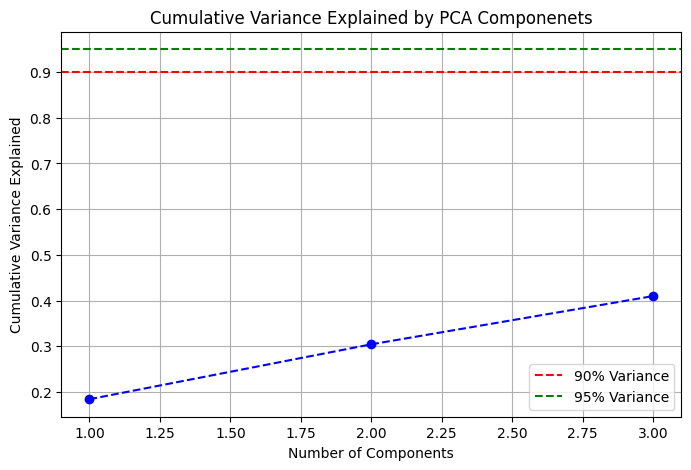

In [61]:
# plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by PCA Componenets')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.grid()
plt.show()


In [65]:
# Display results
print('PCA components (first 5 rows): ')


PCA components (first 5 rows): 


In [63]:
print("\nExplained Variance Ratio (for each PC): ")
print(explained_variance)


Explained Variance Ratio (for each PC): 
[0.1839623  0.12015164 0.10560044]


In [64]:
print("\nCumulative Variance:")
print(cumulative_variance)


Cumulative Variance:
[0.1839623  0.30411394 0.40971438]


## Advertising Dataset

    - Perform PCA on advertising-sale dataset

In [74]:
advertise_df = pd.read_csv("./data_pd/advertising.csv")
advertise_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [75]:
# columns = ['TV', 'Radio', 'Newspaper', 'Sales']

In [76]:
# # Generate indivisual scatterplots for each pair of columns
# for i in range(len(columns)):
#     for j in range(i +1, len(columns)):
#         plt.figure(figsize=(6,4))
#         plt.scatter(advertise_df[columns[i]], advertise_df[columns[j]], alpha = 0.7, edgecolors='k')
#         plt.xlabel(columns[i].capitalize())
#         plt.ylabel(columns[j].capitalize())
#         plt.title(f'{columns[i].capitalize()} vs {columns[j].capitalize()}')
#         plt.grid(True, linestyle = '--', alpha= 0.5)
#         plt.tight_layout()
#         plt.show()

In [78]:
scaler = StandardScaler()
advertise_df = scaler.fit_transform(advertise_df)
advertise_df

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [83]:
# Apply PCA
pca = PCA(n_components=3)   # Reduce to n components, In most cases people stop at 5
X_pca = pca.fit_transform(advertise_df)

In [84]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])


In [85]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.52770708, 0.81646877, 0.98650911])

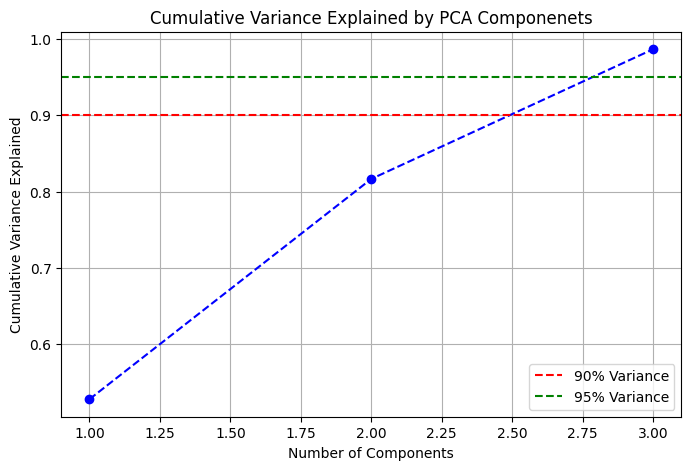

In [86]:
# plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by PCA Componenets')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.grid()
plt.show()


# PCA and Naive bayes

## Diabetes Dataset

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
diabetes_df = pd.read_csv('./data_pd/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
# Define columns for Scaling
standard_scaler_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age']
min_max_scaler_cols = ['SkinThickness', 'Insulin', 'BMI']

In [93]:
# Standard Scaling
standard_scaler = StandardScaler()
diabetes_df[standard_scaler_cols] = standard_scaler.fit_transform(diabetes_df[standard_scaler_cols])

In [94]:
# Min Max Scaling
min_max_scaler = MinMaxScaler()
diabetes_df[min_max_scaler_cols] = min_max_scaler.fit_transform(diabetes_df[min_max_scaler_cols])

In [96]:
# Display all the columns temporarily
pd.set_option('display.max_columns', None)
diabetes_df.head()
pd.reset_option("display.max_column")

In [97]:
# Feature and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [98]:
# Split the dataset into traiing and testing sets
X_train, X_test, y_train, y_yest = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Apply PCA to retain the tpo 3 compoenent
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [100]:
# Display the variance captured by each compoenet
print("Explained Variance Ratio:")
for i, var_ratio in enumerate(pca.explained_variance_ratio_):
    print(f" Component {i+1}: {var_ratio:.4f} of variance")
    

Explained Variance Ratio:
 Component 1: 0.3544 of variance
 Component 2: 0.2253 of variance
 Component 3: 0.1670 of variance


In [101]:
# Naive Bayes Model
model = GaussianNB()
model.fit(X_train_pca, y_train)

GaussianNB()

In [105]:
# Make predictions
y_pred = model.predict(X_test_pca)
type(y_pred)

numpy.ndarray